In [168]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [169]:
df_full = pd.read_csv('../data/cmsa_combined.csv')

In [170]:
df_full.columns

Index(['datetime', 'GAWW-11', 'GAWW-12', 'GAWW-14', 'vacation_dummy',
       'holiday_dummy', 'stringency_index', 'checkin_dam', 'checkout_dam',
       'checkin_nieuwmarkt', 'checkout_nieuwmarkt', 'hotel_gasten',
       'hotel_overnachtingen', 'airport_tot_passengers',
       'airport_arrived_passengers', 'airport_departed_passengers',
       'covid_cases', 'covid_hospital', 'covid_deaths', 'wind_direction',
       'wind_speed', 'wind_speed_10m', 'wind_gust', 'temperature',
       'temperature_min', 'dew_point_temperature', 'radiation_duration',
       'global_radiation', 'precipitation_duration', 'precipitation_h',
       'pressure', 'sight', 'cloud_cover', 'relative_humidity', 'weather_code',
       'weather_index', 'fog', 'rain', 'snow', 'thunder', 'ice'],
      dtype='object')

In [171]:
# df_full = df_full.iloc[:,1:].set_index('datetime')
df_full = df_full.set_index('datetime')

In [172]:
start_train = '2020-09-01 00:00:00'
end_train = '2021-12-01 00:00:00'

In [173]:
df_train = df_full[(df_full.index >= start_train) & (df_full.index < end_train)]

In [174]:
label_encoder = LabelEncoder()
df_train['vacation_dummy'] = label_encoder.fit_transform(df_train['vacation_dummy']).astype('float64')
df_train['holiday_dummy'] = label_encoder.fit_transform(df_train['holiday_dummy']).astype('float64')

/var/folders/3k/f1097l0x5kv5_h73ypy7tnfr0000gn/T/ipykernel_72763/515974365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['vacation_dummy'] = label_encoder.fit_transform(df_train['vacation_dummy']).astype('float64')
/var/folders/3k/f1097l0x5kv5_h73ypy7tnfr0000gn/T/ipykernel_72763/515974365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['holiday_dummy'] = label_encoder.fit_transform(df_train['holiday_dummy']).astype('float64')


<AxesSubplot:>

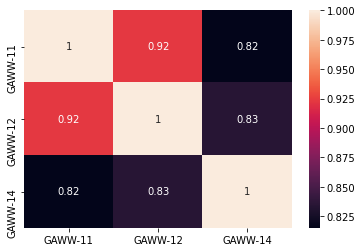

In [192]:
sns.heatmap(df_full[['GAWW-11', 'GAWW-12', 'GAWW-14']].corr(), annot=True)

In [175]:
df_train_11 = df_train.drop(columns=['GAWW-12', 'GAWW-14'])
df_train_12 = df_train.drop(columns=['GAWW-11', 'GAWW-14'])
df_train_14 = df_train.drop(columns=['GAWW-11', 'GAWW-12'])

In [201]:
# df_train_14

In [177]:
corr_11 = df_train_11.corr()
corr_12 = df_train_12.corr()
corr_14 = df_train_14.corr()

<AxesSubplot:>

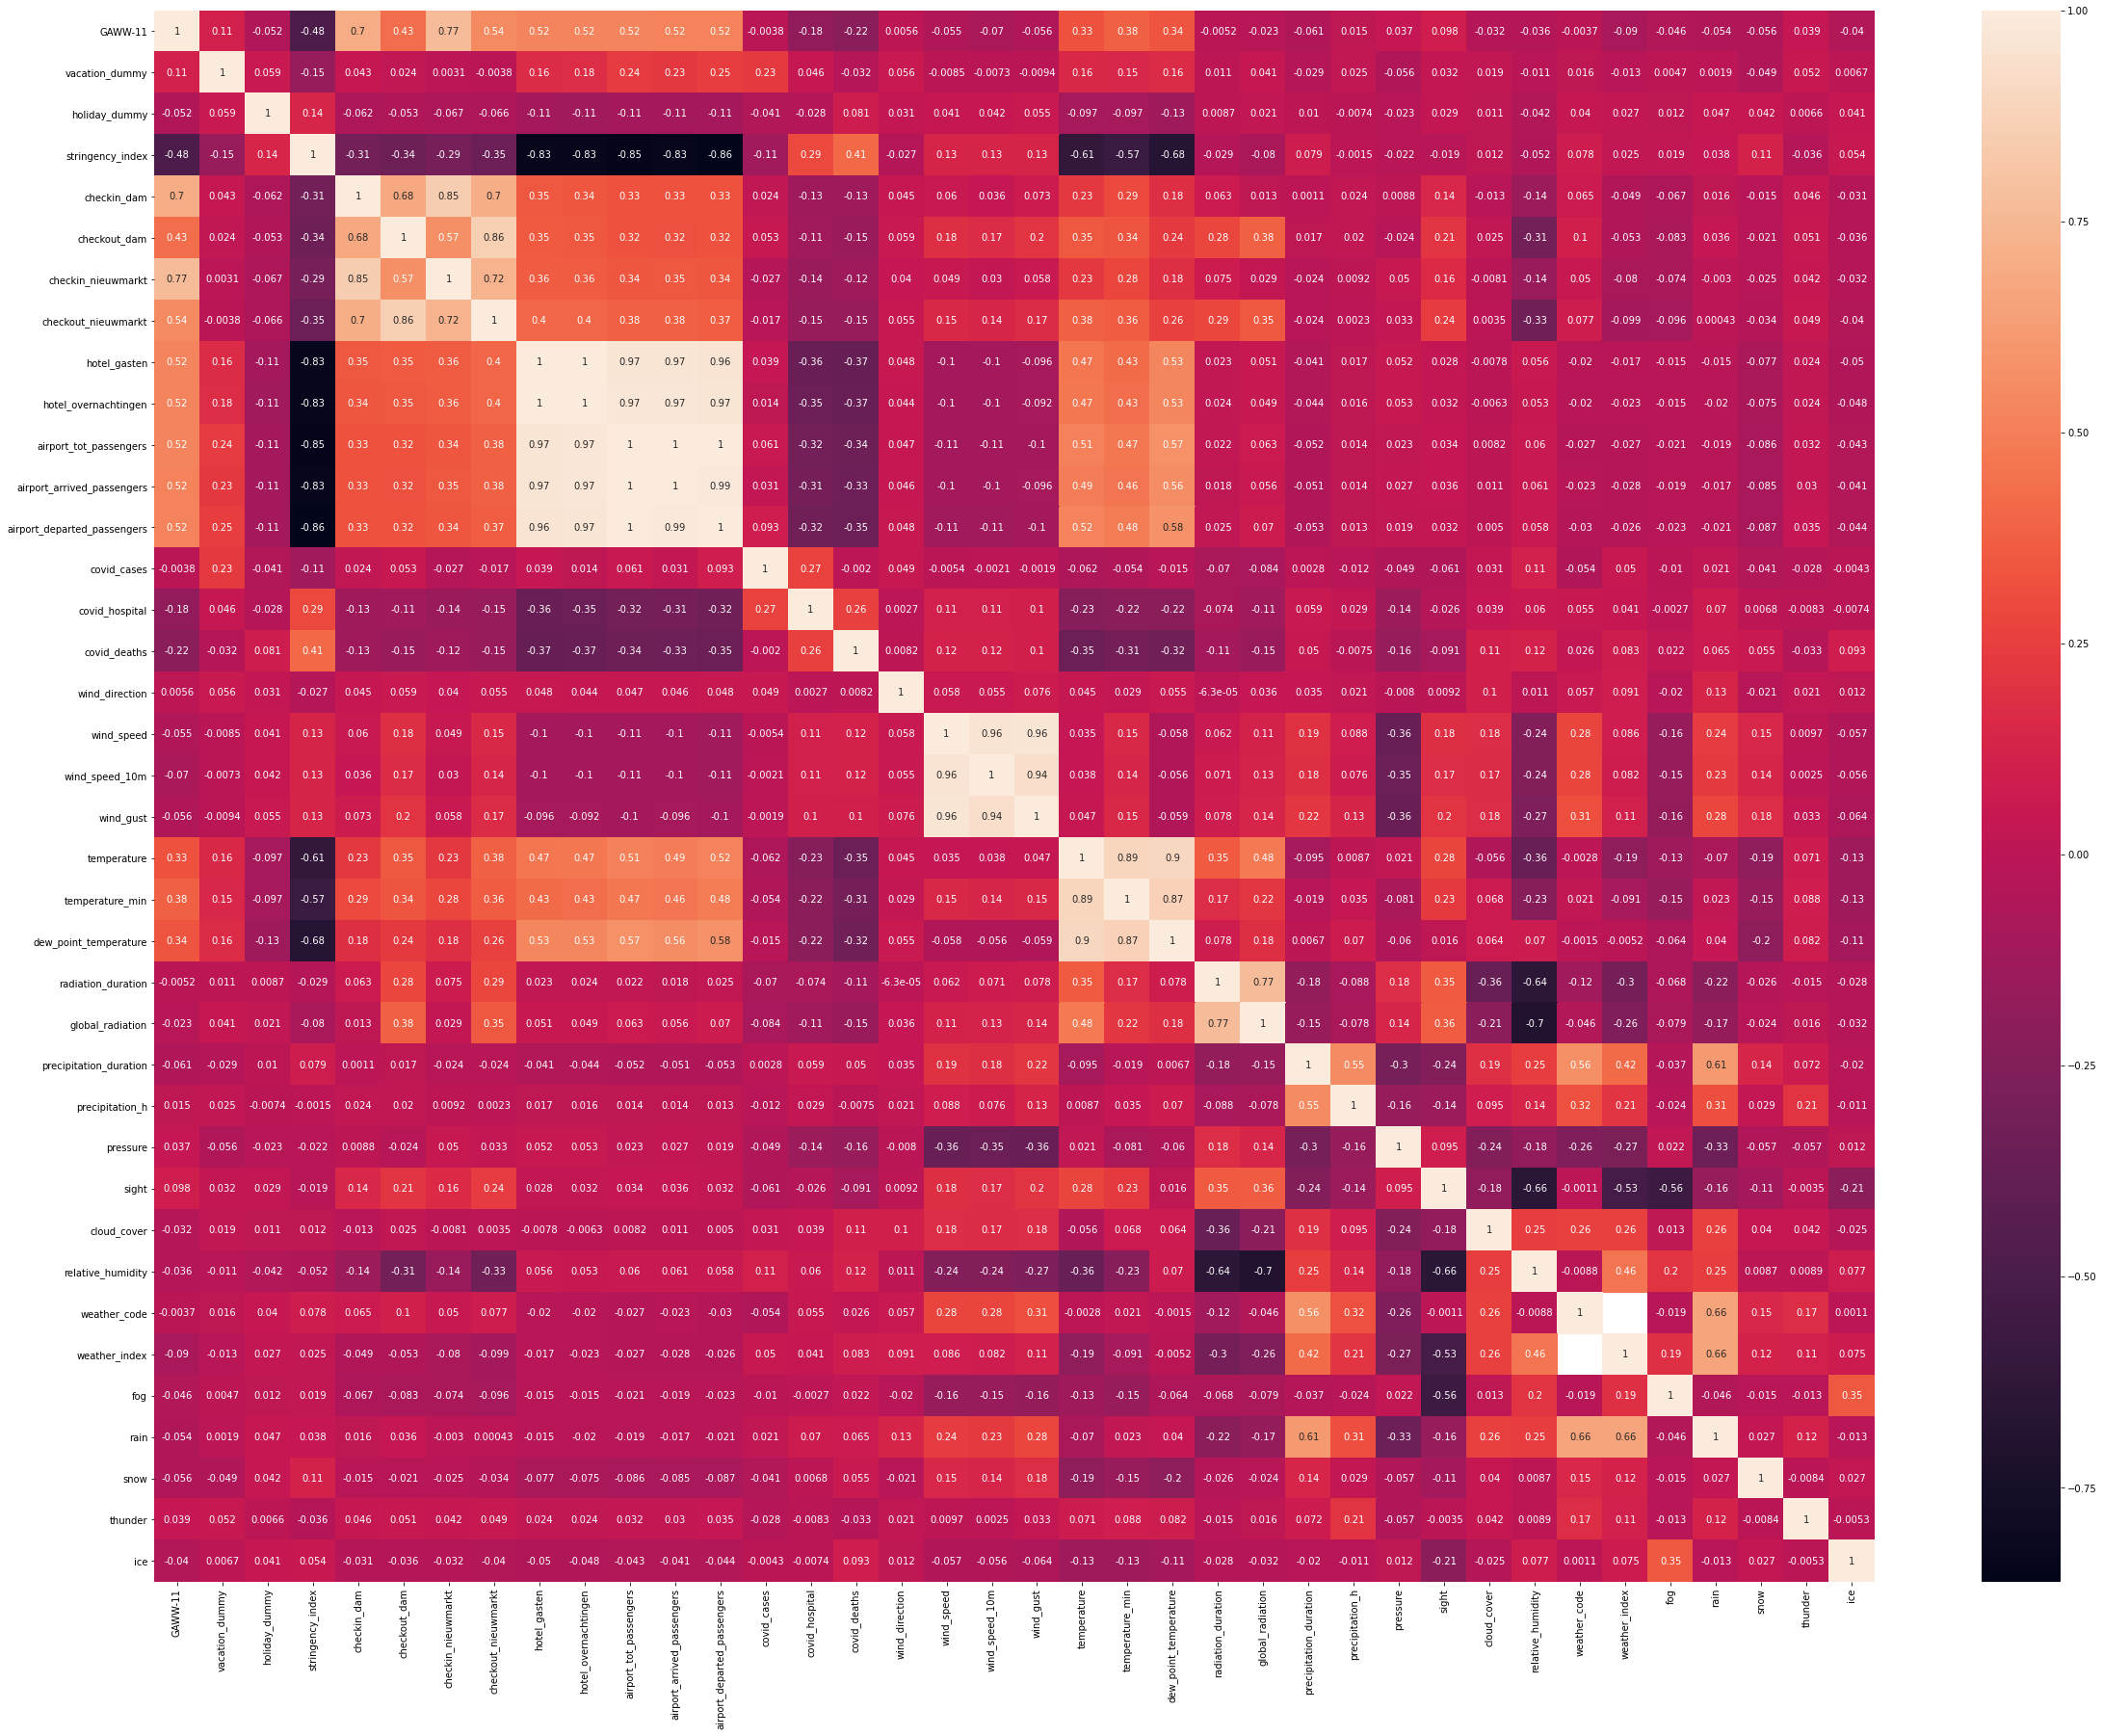

In [184]:
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr_11, annot=True)

<AxesSubplot:>

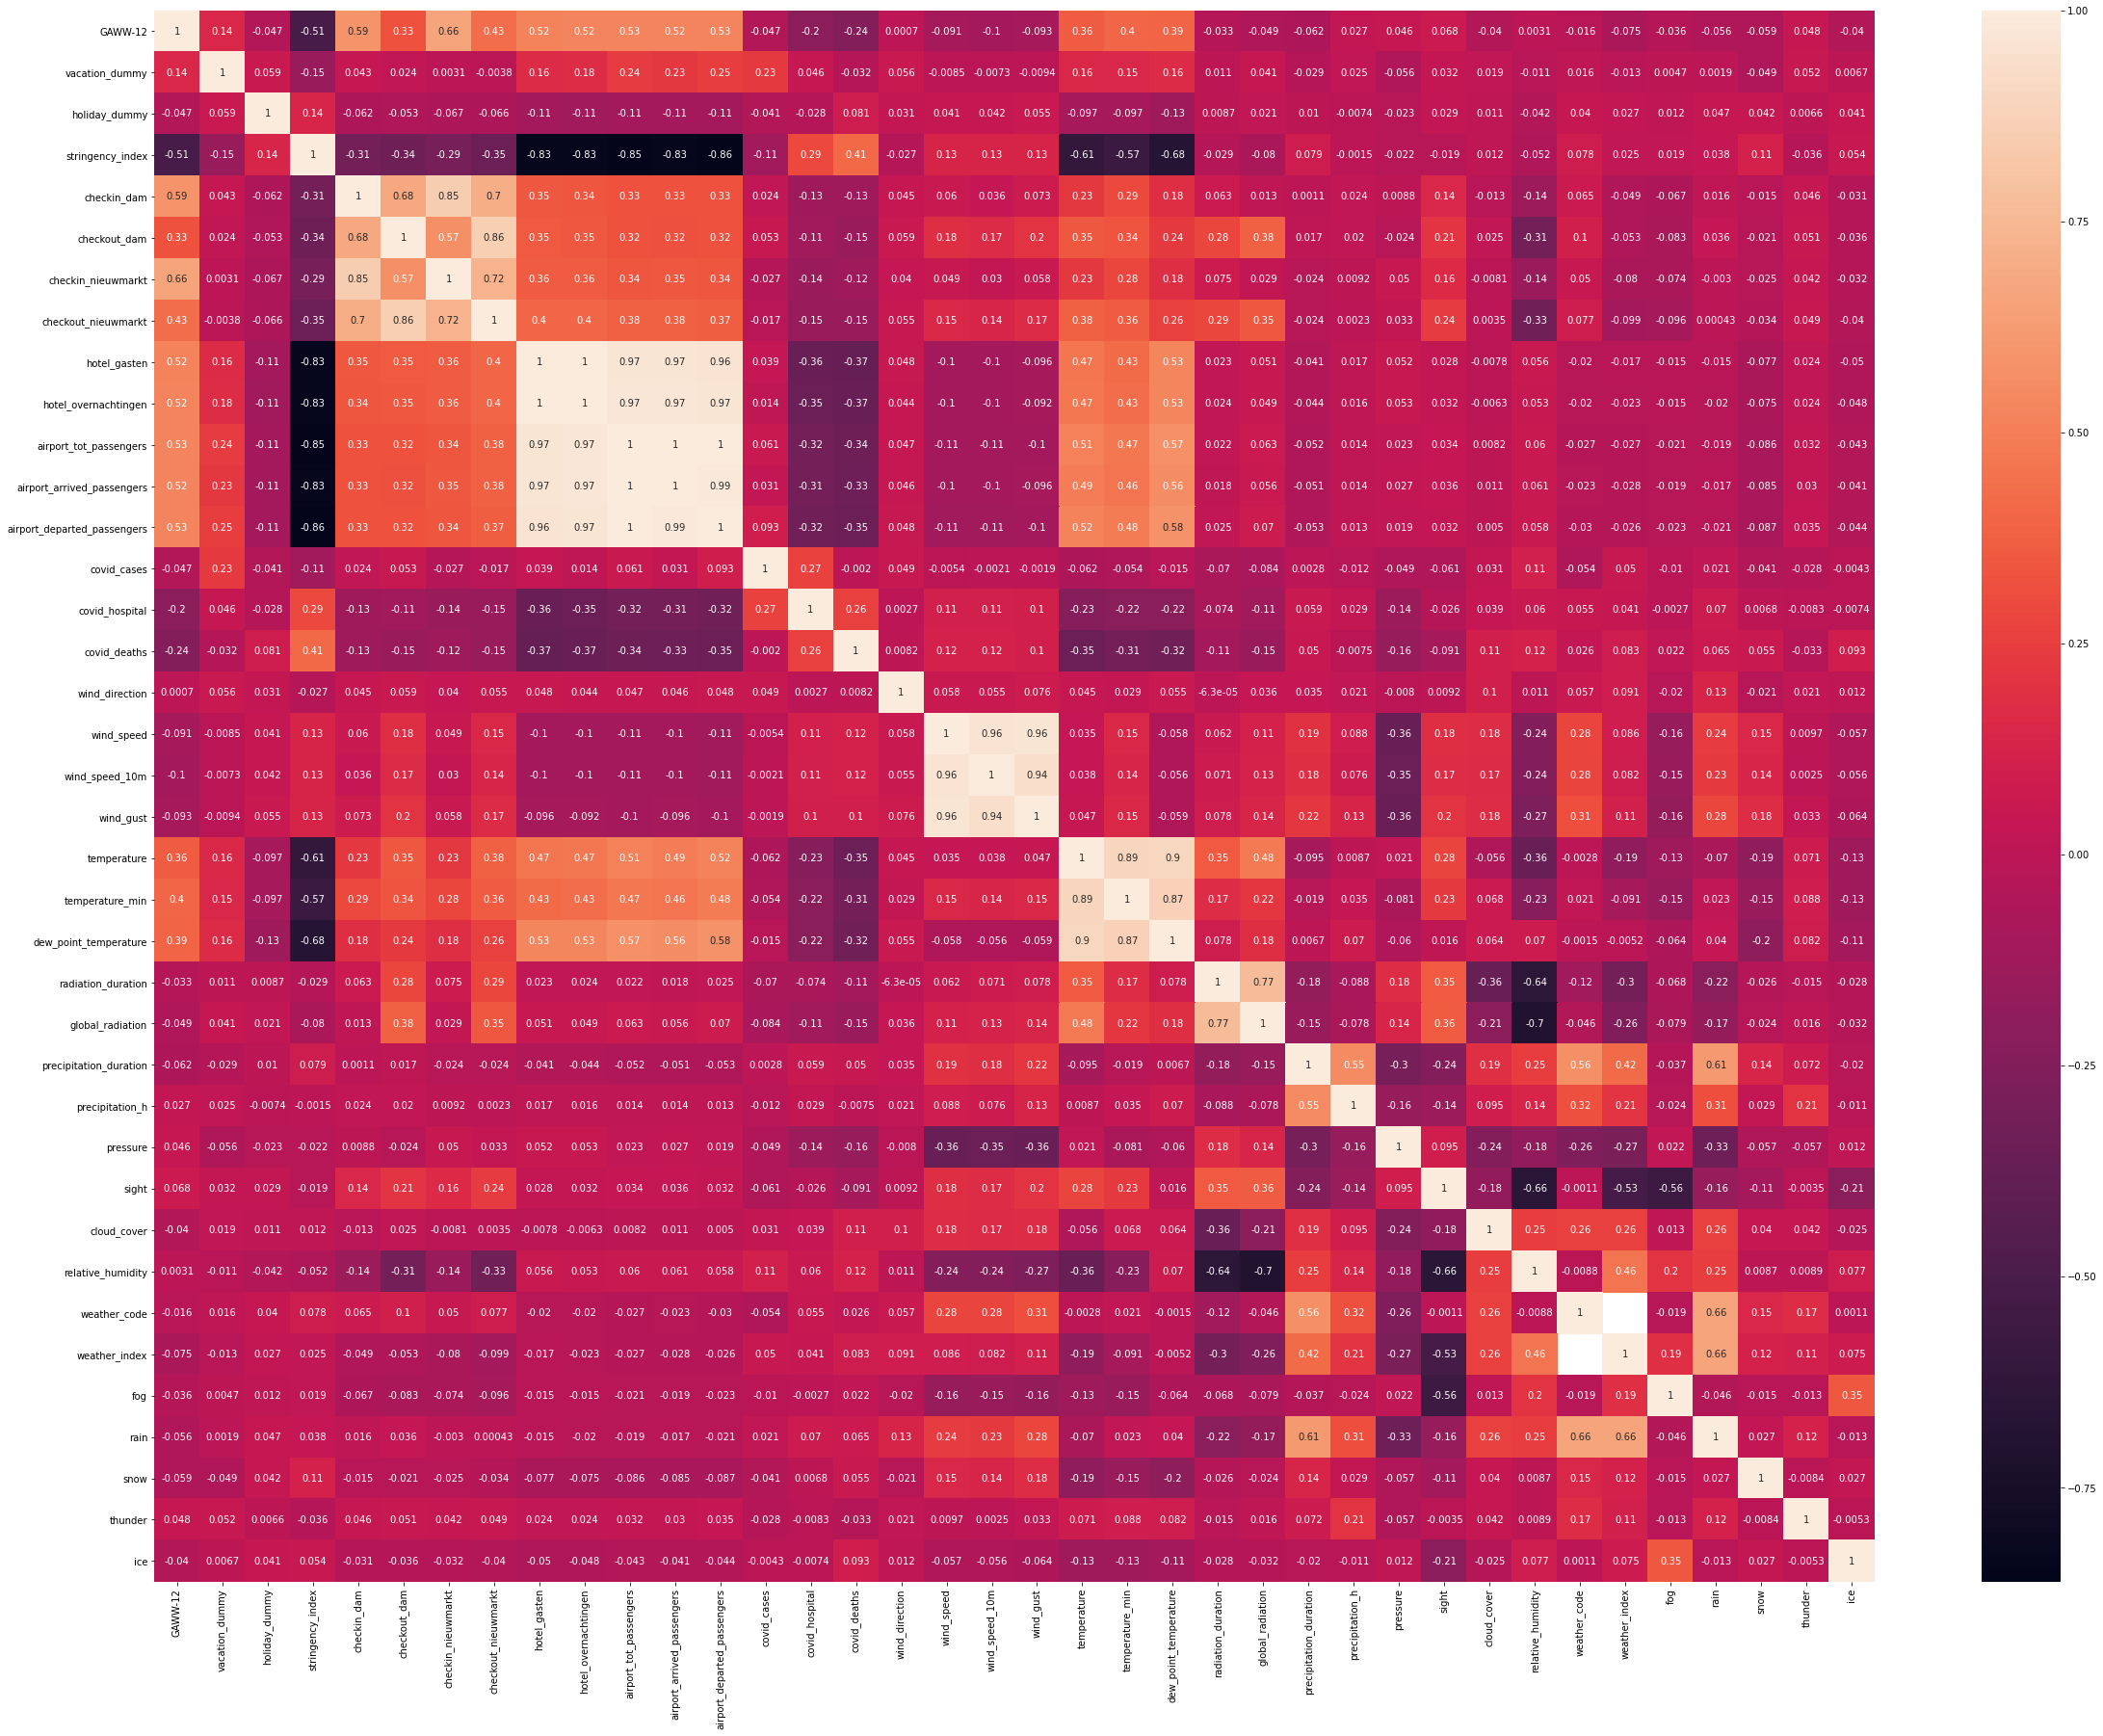

In [185]:
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr_12, annot=True)

<AxesSubplot:>

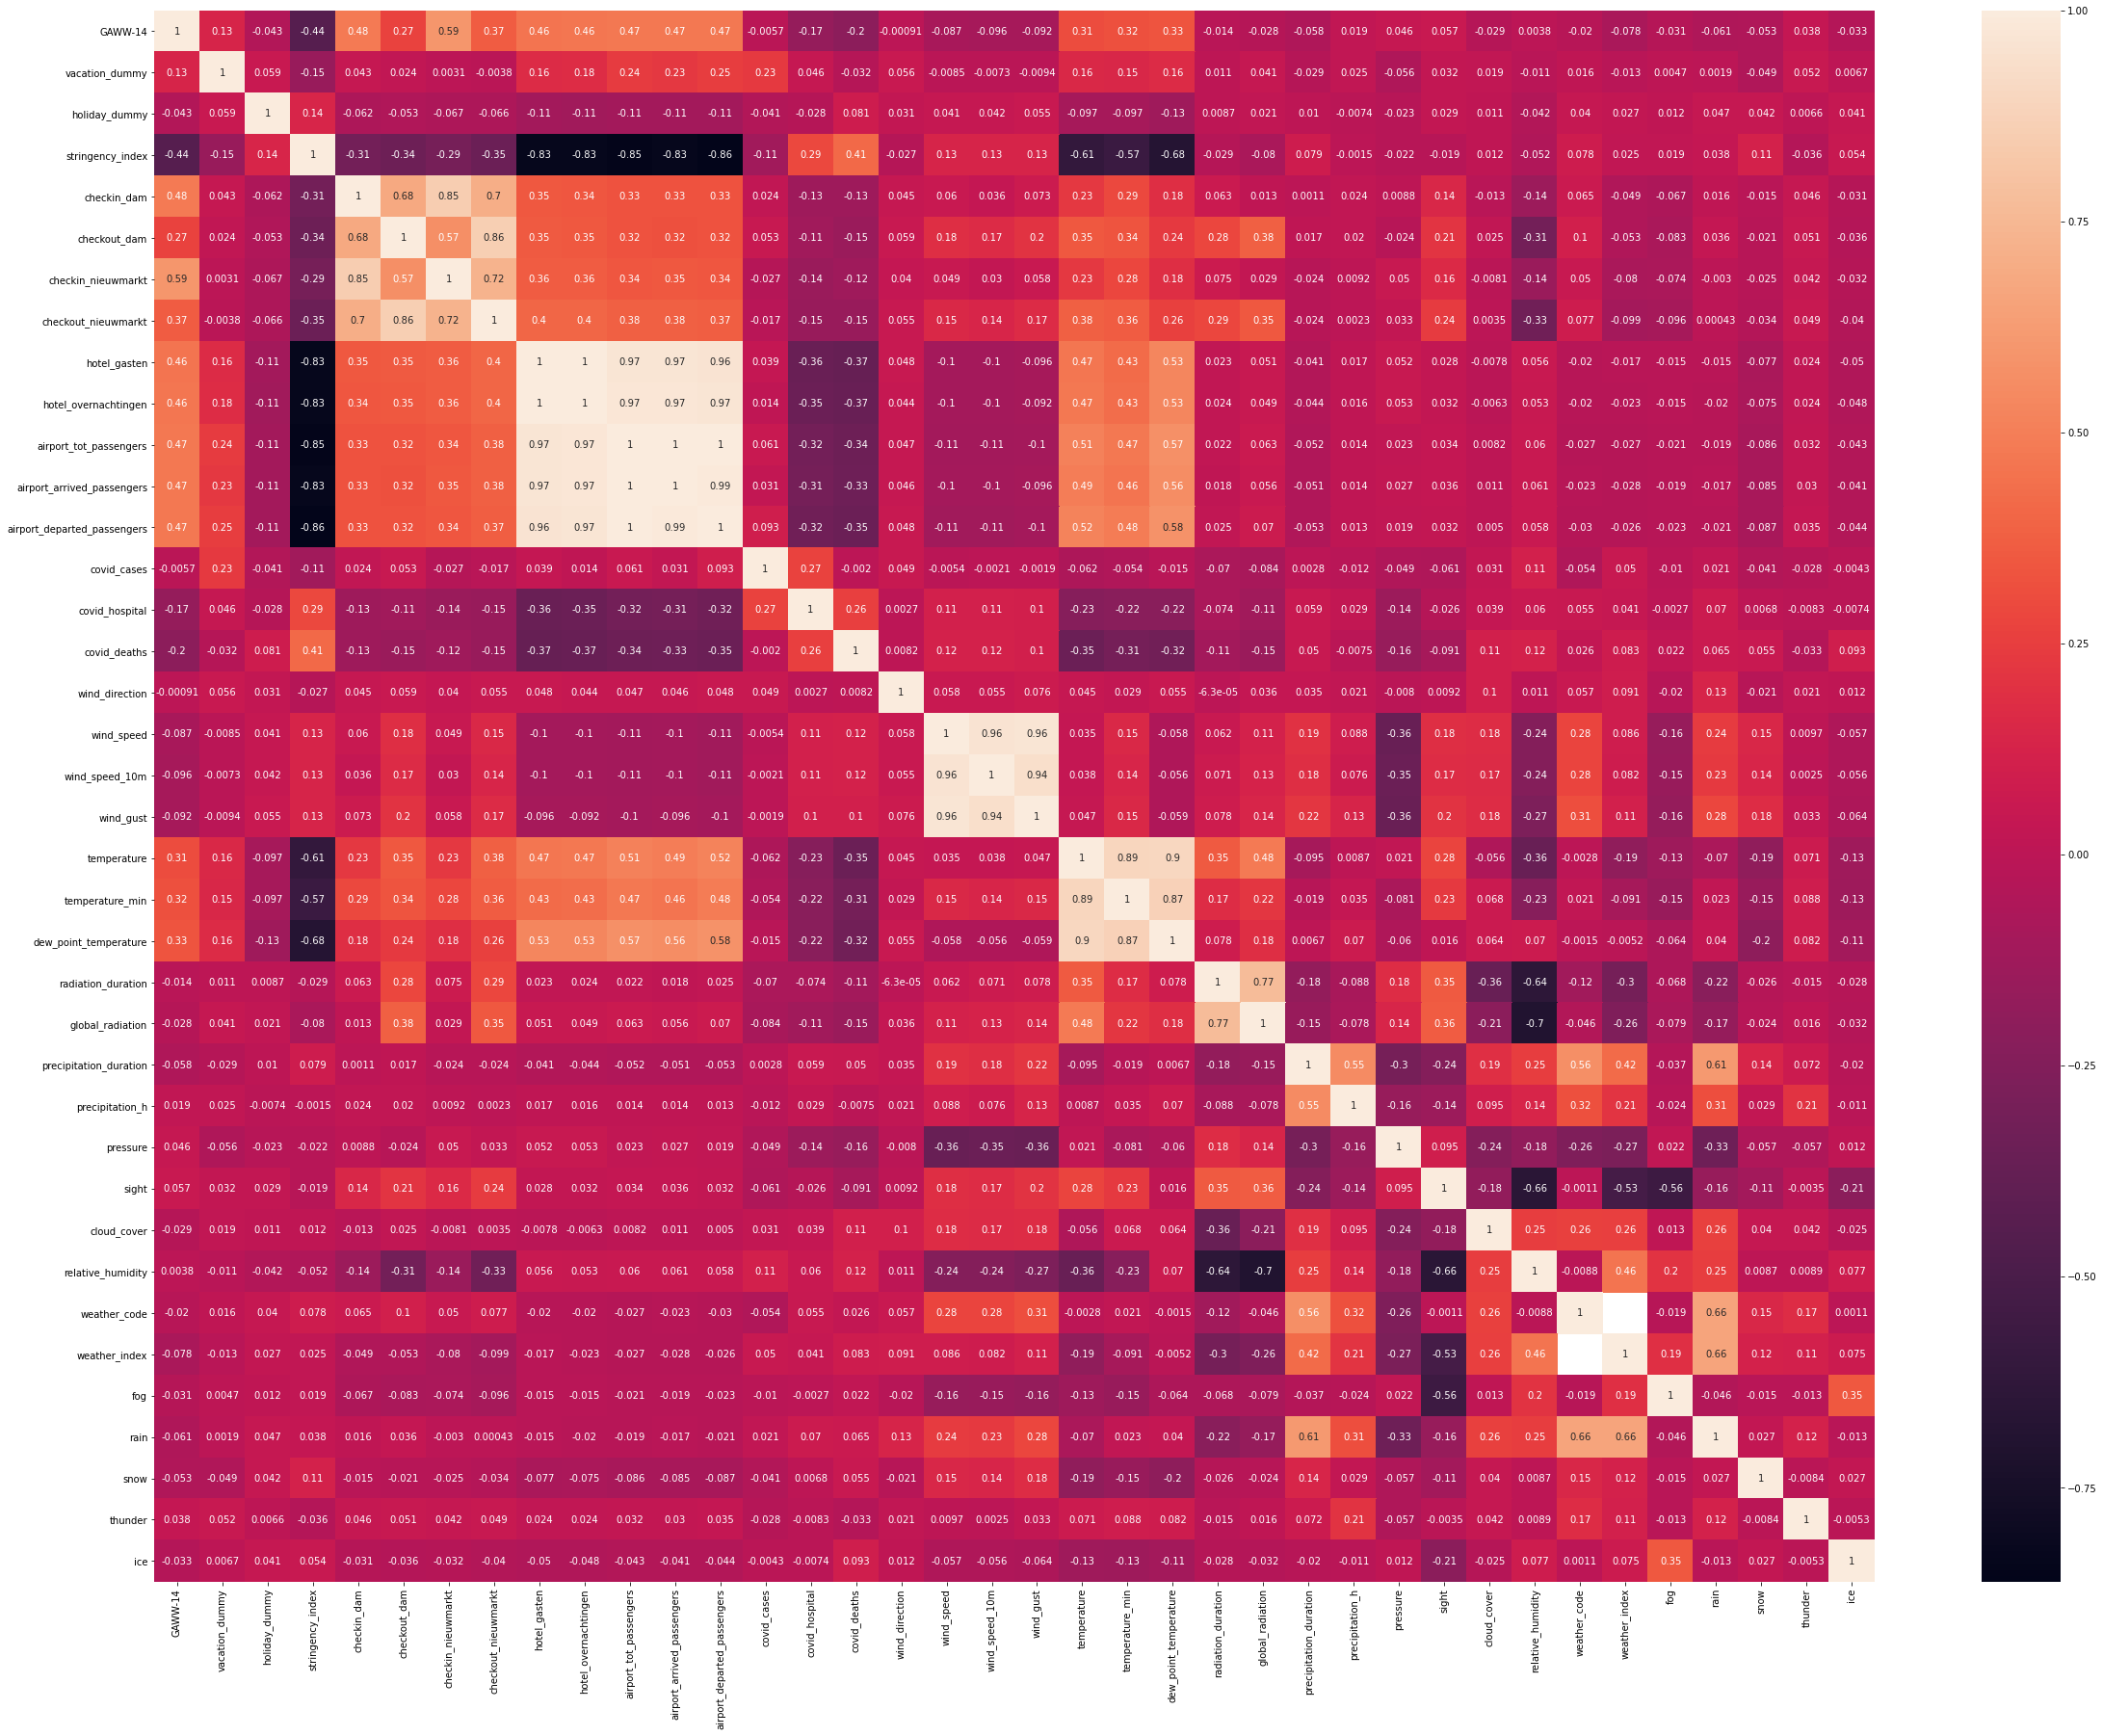

In [186]:
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr_14, annot=True)

In [211]:
#Correlation with output variable
cor_target = abs(corr_14["GAWW-14"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

GAWW-14                        1.000000
stringency_index               0.440604
checkin_dam                    0.481025
checkin_nieuwmarkt             0.592881
hotel_gasten                   0.458450
hotel_overnachtingen           0.462688
airport_tot_passengers         0.471925
airport_arrived_passengers     0.469833
airport_departed_passengers    0.470826
Name: GAWW-14, dtype: float64

In [149]:
# remove features that cross correlate -> higher than 0.9
def cross_corr(df, corr):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    df = df[selected_columns]
    
    return df

In [199]:
set(df_train_12.columns)

{'GAWW-12',
 'airport_arrived_passengers',
 'airport_departed_passengers',
 'airport_tot_passengers',
 'checkin_dam',
 'checkin_nieuwmarkt',
 'checkout_dam',
 'checkout_nieuwmarkt',
 'cloud_cover',
 'covid_cases',
 'covid_deaths',
 'covid_hospital',
 'dew_point_temperature',
 'fog',
 'global_radiation',
 'holiday_dummy',
 'hotel_gasten',
 'hotel_overnachtingen',
 'ice',
 'precipitation_duration',
 'precipitation_h',
 'pressure',
 'radiation_duration',
 'rain',
 'relative_humidity',
 'sight',
 'snow',
 'stringency_index',
 'temperature',
 'temperature_min',
 'thunder',
 'vacation_dummy',
 'weather_code',
 'weather_index',
 'wind_direction',
 'wind_gust',
 'wind_speed',
 'wind_speed_10m'}

In [200]:
set(cross_corr(df_train_12, corr_12).columns)

{'GAWW-12',
 'checkin_dam',
 'checkin_nieuwmarkt',
 'checkout_dam',
 'checkout_nieuwmarkt',
 'cloud_cover',
 'covid_cases',
 'covid_deaths',
 'covid_hospital',
 'fog',
 'global_radiation',
 'holiday_dummy',
 'hotel_gasten',
 'ice',
 'precipitation_duration',
 'precipitation_h',
 'pressure',
 'radiation_duration',
 'rain',
 'relative_humidity',
 'sight',
 'snow',
 'stringency_index',
 'temperature',
 'temperature_min',
 'thunder',
 'vacation_dummy',
 'weather_code',
 'weather_index',
 'wind_direction',
 'wind_speed'}

In [193]:
cross_corr(df_train_12, corr_12)

,GAWW-12,vacation_dummy,holiday_dummy,stringency_index,checkin_dam,checkout_dam,checkin_nieuwmarkt,checkout_nieuwmarkt,hotel_gasten,covid_cases,...,sight,cloud_cover,relative_humidity,weather_code,weather_index,fog,rain,snow,thunder,ice
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-01 00:00:00,113.0,0.0,0.0,50.93,48.0,23.0,58.0,17.0,215,71.0,...,70,8,85,NaN,5,0,0,0,0,0
2020-09-01 00:15:00,109.0,0.0,0.0,50.93,48.0,25.0,58.0,17.0,215,71.0,...,70,8,85,NaN,5,0,0,0,0,0
2020-09-01 00:30:00,88.0,0.0,0.0,50.93,48.0,25.0,58.0,17.0,215,71.0,...,70,8,85,NaN,5,0,0,0,0,0
2020-09-01 00:45:00,99.0,0.0,0.0,50.93,48.0,25.0,58.0,17.0,215,71.0,...,70,8,85,NaN,5,0,0,0,0,0
2020-09-01 01:00:00,84.0,0.0,0.0,50.93,12.0,20.0,58.0,17.0,215,71.0,...,75,8,78,NaN,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 22:45:00,22.0,0.0,0.0,56.48,42.0,49.0,46.0,57.0,418,776.0,...,66,8,90,23.0,7,0,1,0,0,0
2021-11-30 23:00:00,25.0,0.0,0.0,56.48,17.0,32.0,37.0,38.0,418,776.0,...,48,8,92,81.0,7,0,1,0,0,0
2021-11-30 23:15:00,22.0,0.0,0.0,56.48,17.0,33.0,37.0,41.0,418,776.0,...,48,8,92,81.0,7,0,1,0,0,0
